In [1]:
# Imports
import tensorflow as tf

In [2]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


In [3]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [4]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

node3:  Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3):  7.0


In [6]:
# Jusque là, rien de nouveau !
# Ce graphe est assez boring, il dépend de constantes ...
# Mais pas de panique !
# C'est ici qu'entrent en jeu les <placeholder> :
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# Ce sont des noeuds :
print("a:", a)
print("b:", b)
# Et on peut créer des noeuds dépendant d'eux
adder = a + b

a: Tensor("Placeholder_2:0", dtype=float32)
b: Tensor("Placeholder_3:0", dtype=float32)


In [7]:
# Ici, je découvre que alt + enter crée un nouveau noeud
# tout en éxécutant, c'est génial !

# Maintenant, si on veut éxécuter adder, on a besoin
# de lui donner un dictionnaire de paramètres:
print(sess.run(adder, feed_dict={
    a: 3, b: 4.5
}))
print(sess.run(adder, feed_dict={
    a: [i for i in range(8)], b: [4 for i in range(8)]
}))

7.5
[  4.   5.   6.   7.   8.   9.  10.  11.]


In [8]:
# On fait encore plus compliqué, #whaaaa
triple = adder * 3

In [11]:
print(sess.run(triple, {a: 3, b:4.5}))

22.5


In [12]:
# On attaque maintenant les noeuds dont le résultat varie
# Ils utilisent ... wait for it ...
# des Variables !
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [13]:
# /!\ initialiser les variables !
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
print(sess.run(linear_model, {x:[1,2,3,4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


In [16]:
# Bon, on a un modèle basique
# Pour tester sa fiabilité, il nous faut un échantillon
# comparatif de ce qu'on cherche à atteindre
y = tf.placeholder(tf.float32)

In [17]:
# Ensuite, une fonction de calcul [vectoriel] de l'erreur
squared_deltas = tf.square(linear_model - y)
# On obtient un vecteur des erreurs locales

In [18]:
# Pour finir, on somme le vecteur.
loss = tf.reduce_sum(squared_deltas)
# ici, reduce_sum veut dire que même dans le cas d'un
# tensor de dimension > 1, on le réduit à un réel
# (au vu des paramètres, tous à la valeur défault)

In [19]:
# Ici, on regarde l'erreur entre modele(x) et y
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.66


In [20]:
# Les valeurs parfaites pour W & b sont resp. -1 & 1.
# On pourrait les trouver manuellement, avec l'opération:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])

[array([-1.], dtype=float32), array([ 1.], dtype=float32)]

In [21]:
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

0.0


In [22]:
# What a guess, on a réussi à minimiser l'erreur au harsard,
# On est trop forts !!§

# Pour minimiser automatiquement, ça devient plus compliqué
# tensorflow propose des <optimizers>
# Le plus simple est la descente du gradient

# Elle utilise la dérivée de la fonction d'erreur,
# le gradient. Calculer la dérivée à la main étant
# propice à erreurs, tensorflow peut le faire à notre
# place lorsqu'on appelle l'<optimizer>

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [23]:
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


In [24]:
# Ci-dessus, les paramètres du modèle une fois qu'il a appris
# On peut vérifier l'erreur, comparée au départ de 23.66 :
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

5.69997e-11


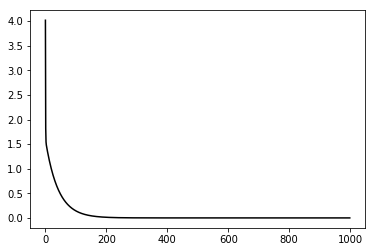

In [27]:
# Très petit, non ?
# Pour le fun, un petit graphing de l'erreur en utilisant
# matplotlib.pyplot
import matplotlib.pyplot as plt
sess.run(init) # reset values to incorrect defaults.
losses = []
for i in range(1000):
    sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})
    losses.append(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

plt.plot([i for i in range(1000)], losses, 'k-')
plt.show()

In [30]:
# Donc par exemple, les 400 premiers essais par exemple
# semblent suffisant
sess.run(init) # reset values to incorrect defaults.
for i in range(400):
  sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))
# Déjà pas mal !!

0.000106178


In [31]:
# Code complet :
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x:x_train, y:y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


In [33]:
# Maintenant, introduisons tf.contrib.learn pour simplifier
# le code ci-dessus

import tensorflow as tf
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np

# Declare list of features. We only have one real-valued feature. There are many
# other types of columns that are more complicated and useful.
features = [tf.contrib.layers.real_valued_column("x", dimension=1)]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# logistic regression, linear classification, logistic classification, and
# many neural network classifiers and regressors. The following code
# provides an estimator that does linear regression.
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use `numpy_input_fn`. We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x = np.array([1., 2., 3., 4.])
y = np.array([0., -1., -2., -3.])
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4,
                                              num_epochs=1000)

# We can invoke 1000 training steps by invoking the `fit` method and passing the
# training data set.
estimator.fit(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did. In a real example, we would want
# to use a separate validation and testing data set to avoid overfitting.
estimator.evaluate(input_fn=input_fn)
print('')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2bf5c1b70>, '_tf_random_seed': None, '_is_chief': True, '_save_checkpoints_steps': None, '_master': '', '_environment': 'local', '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpr77_wzom/m

In [34]:
# Une nouvelle version qui mélange le low level tensorflow
# et tf.contrib.learning

import numpy as np
import tensorflow as tf
# Declare list of features, we only have one real-valued feature
def model(features, labels, mode):
  # Build a linear model and predict values
  W = tf.get_variable("W", [1], dtype=tf.float64)
  b = tf.get_variable("b", [1], dtype=tf.float64)
  y = W*features['x'] + b
  # Loss sub-graph
  loss = tf.reduce_sum(tf.square(y - labels))
  # Training sub-graph
  global_step = tf.train.get_global_step()
  optimizer = tf.train.GradientDescentOptimizer(0.01)
  train = tf.group(optimizer.minimize(loss),
                   tf.assign_add(global_step, 1))
  # ModelFnOps connects subgraphs we built to the
  # appropriate functionality.
  return tf.contrib.learn.ModelFnOps(
      mode=mode, predictions=y, loss=loss, train_op=train)

estimator = tf.contrib.learn.Estimator(model_fn=model)
# define our data set
x = np.array([1., 2., 3., 4.])
y = np.array([0., -1., -2., -3.])
input_fn = tf.contrib.learn.io.numpy_input_fn({"x": x}, y, 4, num_epochs=1000)

# train
estimator.fit(input_fn=input_fn, steps=1000)
# evaluate our model
print(estimator.evaluate(input_fn=input_fn, steps=10))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc2ccc919e8>, '_tf_random_seed': None, '_is_chief': True, '_save_checkpoints_steps': None, '_master': '', '_environment': 'local', '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpi1z0wwwz/model.ckpt.
INFO:tensorflow:step = 1, loss = 202.774145433
INFO:tensorflow:global_step/sec: 1133.31
INFO:tensorflow:step = 101, loss = 0.0942550942693
INFO:tensorflow:global_step/sec: 1496.84
INFO:tensorflow:step = 201, loss = 0.00865511556701
INFO:tensorflow:global_step/sec: 1332.62
INFO:tensorflow:step = 301, loss = 0.00052865